### [Data Set: South Korea Visitors from Kaggle](https://www.kaggle.com/bappekim/south-korea-visitors)

1. nation: country of departure<br>
    nation은 출발한 국가이지, 방문객의 국적을 의미하지는 않는다. 하지만 이 분석에서는 이 nation을 방문객의 국적과 동일하다고 가정한다.

In [1]:
import pandas as pd

age_data=pd.read_csv('Enter_korea_by_age.csv')
gender_data=pd.read_csv('Enter_korea_by_gender.csv')
purpose_data=pd.read_csv('Enter_korea_by_purpose.csv')

In [2]:
age_data.head()

,date,nation,visitor,growth,share,age0-20,age21-30,age31-40,age41-50,age51-60,age61
0,2019-1,China,392814,28.737870,35.555117,36520,108591,103657,48574,40893,40998
1,2019-1,Japan,206526,23.606830,18.693468,18015,57921,34165,39811,33857,20330
2,2019-1,Taiwan,87954,16.003693,7.961057,18888,17927,18595,18862,8169,4566
3,2019-1,Hong Kong,35896,3.533212,3.249086,3890,11384,7400,5461,4629,2137
4,2019-1,Macao,2570,-12.376406,0.232621,223,1013,762,264,181,92


In [3]:
# date 목록 확인 결과, 2019년 1월부터 2020년 4월까지의 방문기록을 가지고 있음
# set(age_data['date'])

# 한국을 방문한 외국인들의 국가 집합 확인 : 총 60개 국가의 외국인들이 한국을 방문한 것을 확인함
nation=set(age_data['nation'])
print("한국을 방문한 외국인들의 국가 갯수: %d"%len(nation))

한국을 방문한 외국인들의 국가 갯수: 60


**2019년 1월부터 2020년 4월까지 나라별 방문객 총인원 비율 그래프 그리기**

In [4]:
# 2019년 1월부터 2020년 4월까지 나라별 방문객 총 인원 합산
nation_per_visitor={}
for i in list(nation):
    for j in range(len(age_data['nation'])):
        if age_data['nation'][j] in nation_per_visitor:
            nation_per_visitor[age_data['nation'][j]]+=age_data['visitor'][j]
        else:
            nation_per_visitor[age_data['nation'][j]]=age_data['visitor'][j]

result=pd.DataFrame(list(nation_per_visitor.items()),columns=['country','sum of visitor'])

# 나라별 방문객이 많은 순서대로 테이블 재정렬
result.sort_values(by='sum of visitor',ascending=False,inplace=True)
result.reset_index(drop=True,inplace=True)
result.head()

,country,sum of visitor
0,China,397759080
1,Japan,221734860
2,Taiwan,85477740
3,USA,70243140
4,Hong Kong,46989540


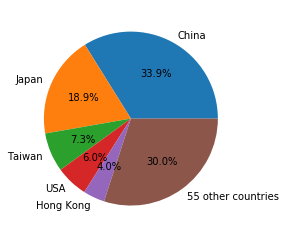

In [7]:
# 상위 5개 및 그외 외국에서 방문객 총 인원 파이그래프 그리기
from matplotlib import pyplot as plt

visitor = list(result['sum of visitor'][:5])
visitor.append(sum(result['sum of visitor'][5:]))
nationality = list(result['country'][:5])
nationality.append('55 other countries')
plt.pie(visitor, labels=nationality, autopct='%.1f%%')
plt.show()

In [11]:
def get_visitor_data(col_name,country):
    visitors={}
    for idx,value in enumerate(age_data['nation']):
        if value.lower() == country:
            month = age_data['date'][idx]
            visitor = age_data[col_name][idx]
            visitors[month] = visitor
    return visitors

In [22]:
# 꺾은선 그래프 그리기
from matplotlib import pyplot as plt
def get_graph(w,h,check,x,y,title,x_label,y_label,legend):
    plt.figure(figsize=(w, h))
    if check:
        plt.plot(x,y, marker='o')
    else:
        for i in range(len(y)):
            plt.plot(x,y[i],marker='o')
        
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if legend:
        plt.legend(legend)
    plt.show()

**2019년 1월부터 2020년 4월까지 월별 외국인 방문자 수 그래프 그리기**

월별 방문자 수를 알고 싶은 외국명을 입력하세요.taiwan


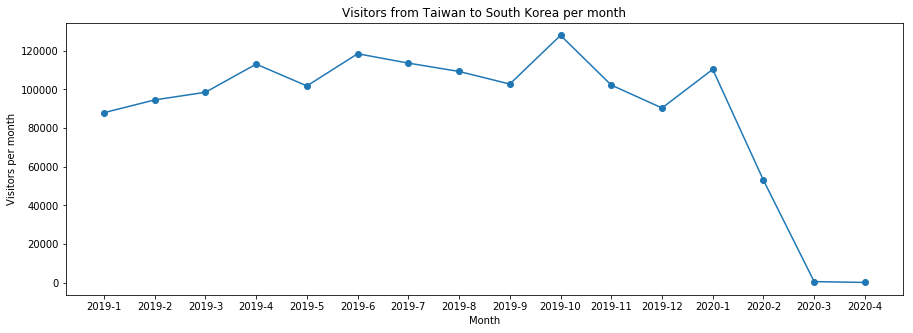

In [30]:
# input으로 국가명 입력 받아서 사전 형태로 월별 방문자수 저장
country=input('월별 방문자 수를 알고 싶은 외국명을 입력하세요.').lower()
visitor_per_month=get_visitor_data('visitor',country)

# 날짜를 x축으로, 방문자수를 y축으로 설정하기 위해 사전의 key값과 value값을 나누어 리스트로 저장
month_data = list(visitor_per_month.keys())
visitor_data = list(visitor_per_month.values())
title="Visitors from "+country.title()+' to South Korea per month'
get_graph(15,5,True,month_data,visitor_data,title,'Month','Visitors per month',[])

**2019년 1월부터 2020년 4월까지 월별 외국인 방문자 수 나이별 비교 그래프 그리기**

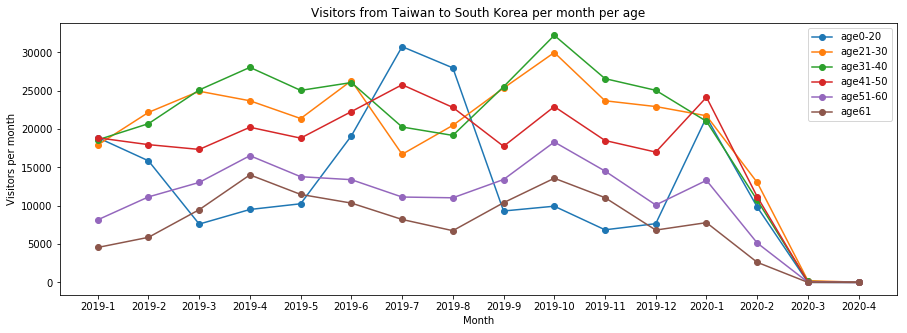

In [31]:
age_set=['age0-20','age21-30','age31-40','age41-50','age51-60','age61']
visitor_per_age_per_month=[]
for i in range(len(age_set)):
    visitor_per_age_per_month.append(list(get_visitor_data(age_set[i],country).values()))
title="Visitors from "+country.title()+' to South Korea per month per age'
get_graph(15,5,False,month_data,visitor_per_age_per_month,title,'Month','Visitors per month',age_set)